In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-16 15:56:40--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.0MB/s    in 2.2s    

2022-09-16 15:56:43 (13.0 MB/s) - ‘images.zip’ saved [29586716/29586716]



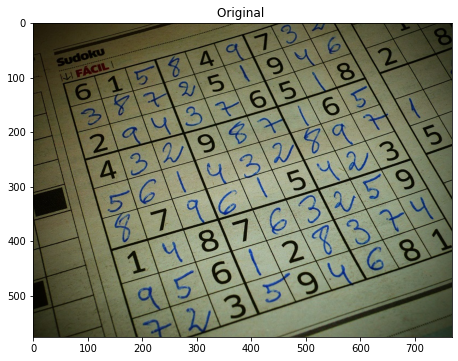

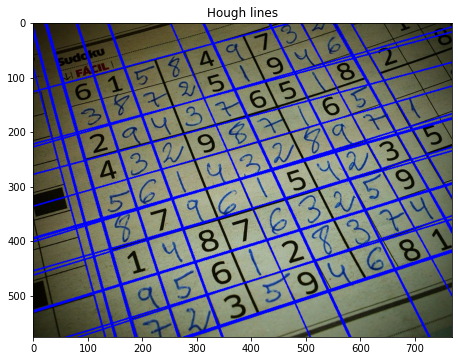

In [3]:
#Line Detection - Using Hough Lines

image = cv2.imread('/content/images/soduku.jpg')
imshow('Original ', image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100 , 170, apertureSize = 3)

lines = cv2.HoughLines(edges, 1 , np.pi / 180 , 240)

for line in lines:
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  x1 = int(x0 + 1000 *(-b))
  y1 = int(y0 + 1000 *(a))
  x2 = int(x0 - 1000 *(-b))
  y2 = int(y0 - 1000 *(a))
  cv2.line(image, (x1, y1),(x2, y2), (255,0,0),2)

imshow('Hough lines', image)  


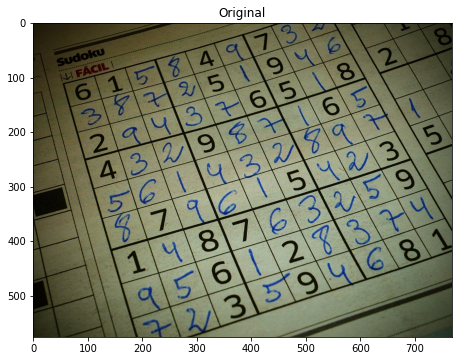

(63, 1, 4)


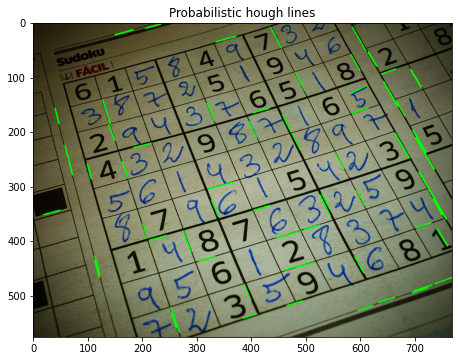

In [4]:
#PROBABILISTIC HOUGH LINES

image = cv2.imread('/content/images/soduku.jpg')
imshow('Original', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100 ,3 ,25)
print(lines.shape)

for x in range(0, len(lines)):
  for x1,y1,x2,y2 in lines[x]:
      cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

imshow('Probabilistic hough lines', image)

In [5]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Circles_Packed_In_Square_11.jpeg

--2022-09-16 15:58:07--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Circles_Packed_In_Square_11.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82585 (81K) [image/jpeg]
Saving to: ‘Circles_Packed_In_Square_11.jpeg’

Circles_Packed_In_S 100%[===================>]  80.65K  --.-KB/s    in 0.008s  

2022-09-16 15:58:07 (9.60 MB/s) - ‘Circles_Packed_In_Square_11.jpeg’ saved [82585/82585]



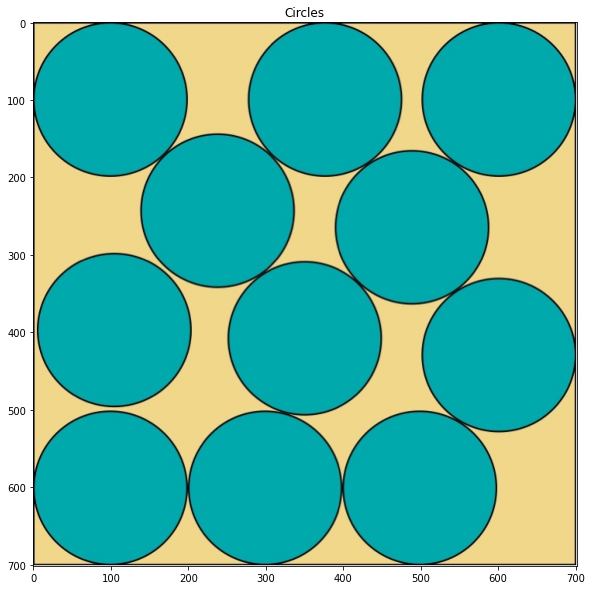

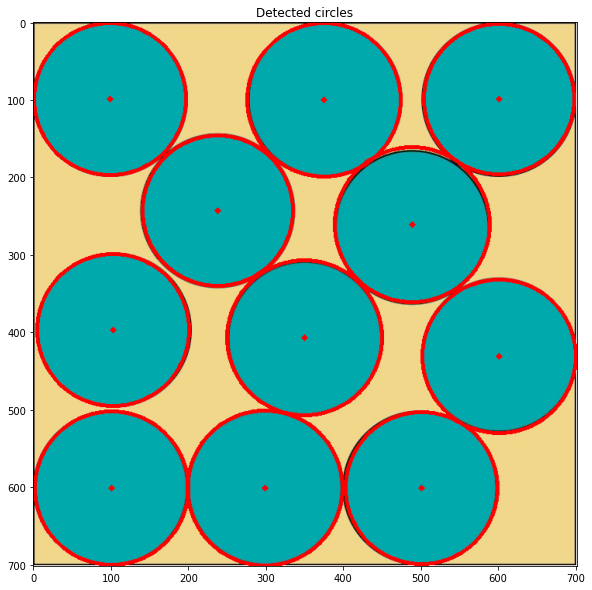

In [18]:
image = cv2.imread('Circles_Packed_In_Square_11.jpeg')
imshow('Circles', image)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blur = cv2.medianBlur(gray ,5)

circles = cv2.HoughCircles(blur , cv2.HOUGH_GRADIENT,1.2 ,25)
cv2.HoughCircles(blur , cv2.HOUGH_GRADIENT, 1.2, 100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  cv2.circle(image , (i[0],i[1]),i[2], (0,0,255),4)

  cv2.circle(image , (i[0],i[1]), 2 , (0,0,255),4)

imshow('Detected circles', image)

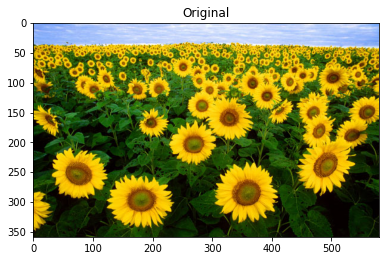

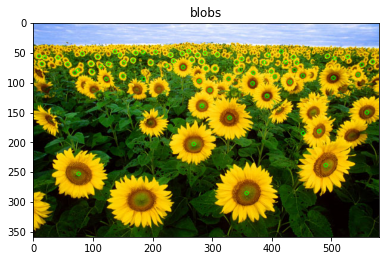

In [21]:
image = cv2.imread("images/Sunflowers.jpg")
imshow("Original", image)

detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                          cv2.DRAW_MATCHES_FLAGS_DEFAULT)

imshow('blobs', blobs)

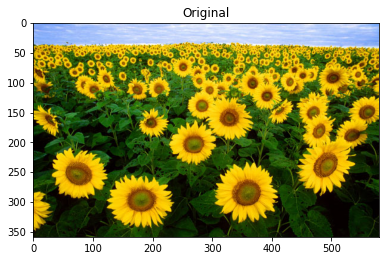

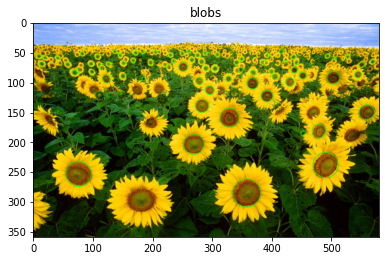

In [24]:
image = cv2.imread("images/Sunflowers.jpg")
imshow("Original", image)

detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

imshow('blobs', blobs)

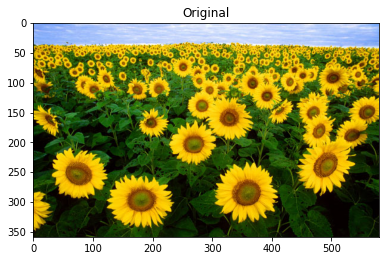

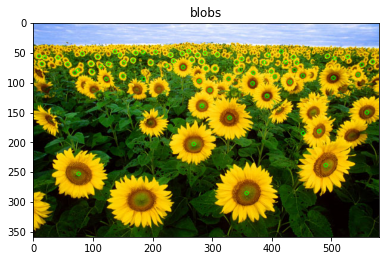

In [26]:
image = cv2.imread("images/Sunflowers.jpg")
imshow("Original", image)

detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                          cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

imshow('blobs', blobs)